In [2]:
import numpy as np
import matplotlib.pyplot as plt


from wavefuncs import f_IR, f_UV
from baseParams import get_warp_params

Define parameters using the centralized configuration from `baseParams`

In [3]:
# You can override defaults here: e.g., get_warp_params(Lambda_IR=10000)
params = get_warp_params() 

epsilon = params['epsilon']
Lambda_IR = params['Lambda_IR']

print(f"Derived epsilon = {epsilon}")
print(f"Lambda_IR = {Lambda_IR} GeV")

Derived epsilon = 2.4572037021869114e-16
Lambda_IR = 3000.0 GeV


Verify that the c = 0.5 blow up is numerically stable

In [10]:
# Define a range of c values (bulk mass parameter)
c_values = np.linspace(-0.5, 1.5, 500)

# Check value at c = 0.5
c_crit = 0.5
f_ir_crit = f_IR(c_crit, epsilon)
f_uv_crit = f_UV(c_crit, epsilon)

print(f"f_IR(0.5) = {f_ir_crit:.4f}")
print(f"f_UV(0.5) = {f_uv_crit:.4f}")
print(f"Expected limit: {np.sqrt(1/(-2*np.log(epsilon))):.4f}")

f_IR(0.5) = 0.1179
f_UV(0.5) = 0.1179
Expected limit: 0.1179


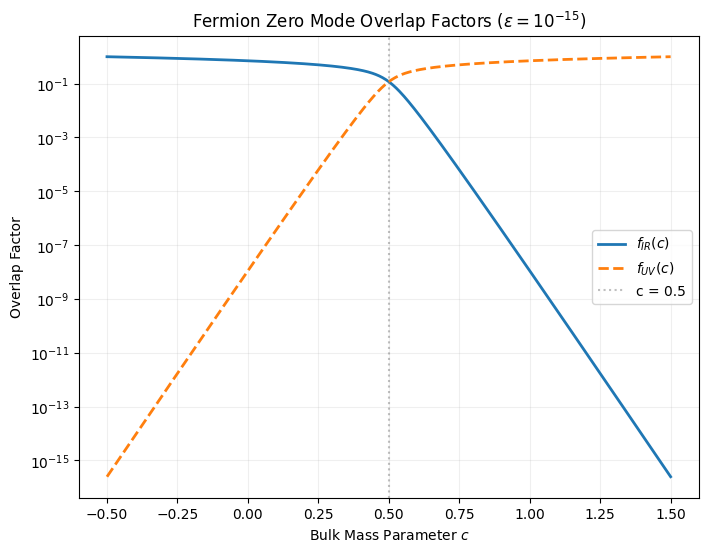

In [11]:
# Compute overlap factors
f_ir = f_IR(c_values, epsilon)
f_uv = f_UV(c_values, epsilon)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(c_values, f_ir, label=r'$f_{IR}(c)$', linewidth=2)
plt.plot(c_values, f_uv, label=r'$f_{UV}(c)$', linewidth=2, linestyle='--')

plt.axvline(0.5, color='gray', linestyle=':', alpha=0.5, label='c = 0.5')
plt.yscale('log')
plt.xlabel('Bulk Mass Parameter $c$')
plt.ylabel('Overlap Factor')
plt.title(fr'Fermion Zero Mode Overlap Factors ($\epsilon = 10^{{{int(np.log10(epsilon))}}}$)')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

### It is easy to vary the KK scale $\Lambda = ke^{-\pi k r_c}$

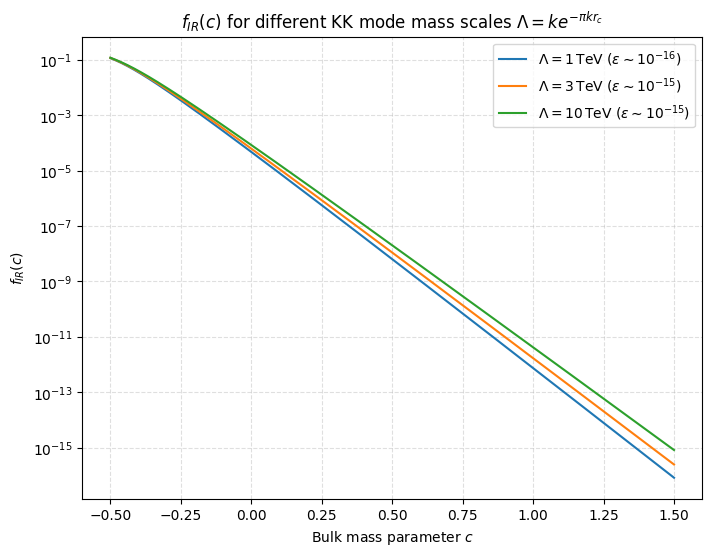

In [12]:
# Plot f_IR(c) for several IR scales (Lambda_IR)
lambda_list = [1e3, 3e3, 10e3]  # GeV: 1 TeV, 3 TeV, 10 TeV

# Define a range of c values in IR
c_values_IR = np.linspace(0.5, 1.5, 500)


plt.figure(figsize=(8, 6))
for Lam in lambda_list:
    params_local = get_warp_params(Lambda_IR=Lam)
    eps_local = params_local['epsilon']
    f_ir_local = f_IR(c_values_IR, eps_local)
    plt.plot(c_values, f_ir_local,
         label=fr'$\Lambda={int(Lam/1000)}\,$TeV ($\epsilon \sim 10^{{{int(np.log10(eps_local))}}}$)')

plt.xlabel('Bulk mass parameter $c$')
plt.ylabel(r'$f_{IR}(c)$')
plt.yscale('log')
plt.title(r'$f_{IR} (c)$ for different KK mode mass scales $\Lambda = ke^{-\pi k r_c}$')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.show()